## Исследование параметров алгоритмов

2016, Александр Дьяконов

На примере случайного леса

In [34]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)


# чтобы был русский шрифт
from matplotlib import rc
font = {'family': 'Vernada', # Droid Sans
        'weight': 'normal',
        'size': 10}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

используем для экспериментов выборку https://www.kaggle.com/c/higgs-boson

In [88]:
data = pd.read_csv('training.csv')
print (data.shape)
data[:5]

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [89]:
data.Label = data.Label.map({'s':1, 'b':0})
X = data.drop('Label', axis=1)
y = data.Label.values
X = X.drop(['Weight', 'EventId'], axis=1)

In [90]:
# Для сокращения времени экспериментов

# тут "совсем" отложенный контроль
X2 = X.values[100000:,:]
y2 = y[100000:]
# обучающая выборка
X = X.values[:100000, :]
y = y[:100000]

### Запуск алгоритма

c OOB-контролем

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

model =  RandomForestRegressor(n_estimators = 10 , oob_score = True, random_state = 1)
model.fit(X, y)
a = model.predict(X2)

print ("AUC-ROC (oob) = ", roc_auc_score(y, model.oob_prediction_))
print ("AUC-ROC (test) = ", roc_auc_score(y2, a))

('AUC-ROC (oob) = ', 0.82478358824671938)
('AUC-ROC (test) = ', 0.87633199294228825)


## Быстрый тест алгоритма

на cv-контроле

[ 0.87516344  0.87565482  0.87746642  0.87745506  0.87430132]
среднее качество = 0.876008212715, разброс = 0.00126267188833, время = 6.62227511406


(0.87330132282668138, 0.8784664151696534)

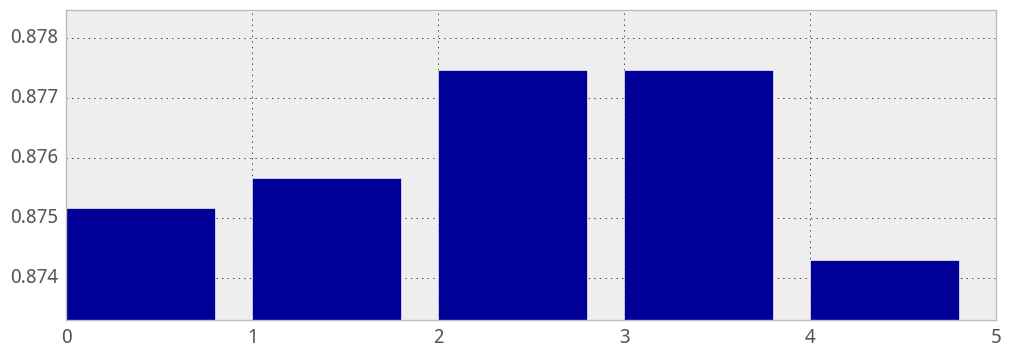

In [24]:
# Случайный лес (5 фолдов)
from sklearn.model_selection import KFold # cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from time import time

tm = time()

cv = KFold(n_splits=5, shuffle=True, random_state=1) # как тестировать

rf = RandomForestClassifier(n_estimators=10, max_features=5, n_jobs=-1, random_state=1) # алгоритм

tmp = cross_val_score(rf, X, y, scoring='roc_auc', cv=cv) # AUC ROC!!!

print (tmp)
print (u'среднее качество = %s, разброс = %s, время = %s' % (mean(tmp), std(tmp), time() - tm))

plt.figure(figsize=(12,4))
plt.bar(np.arange(len(tmp)), tmp, color='#000099')
plt.ylim([min(tmp)-0.001, max(tmp) + 0.001])


### Варьирование параметра

что будет при изменении значений конкретного параметра

Время = 12.4554469585


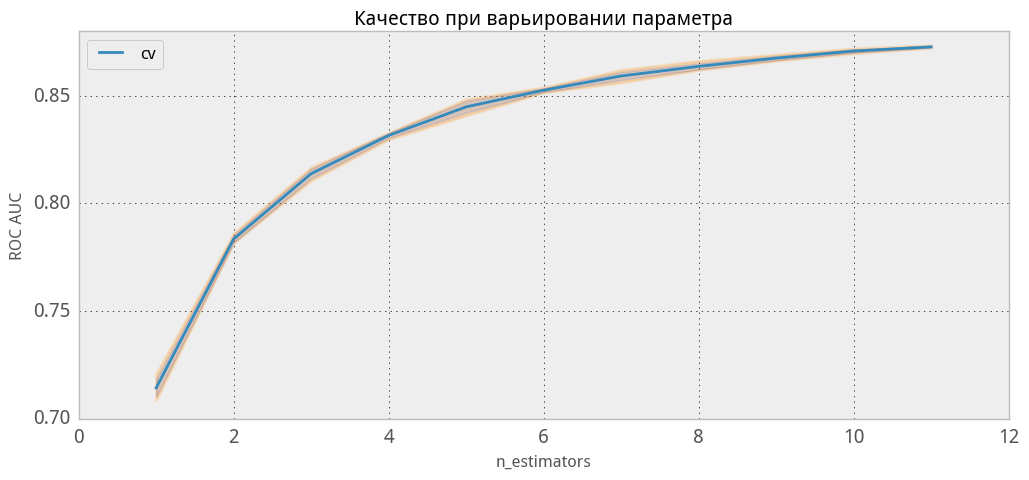

In [25]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from time import time

tm = time()

cv = ShuffleSplit(n_splits=5, test_size=0.75, train_size=None, random_state=1)


rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=5,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)


# gbm = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
#                                  subsample=1.0, criterion='friedman_mse', min_samples_split=2,
#                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4,
#                                  min_impurity_split=1e-07, init=None, random_state=None,
#                                  max_features=None, verbose=0, max_leaf_nodes=None,
#                                  warm_start=False, presort='auto')

# параметр для исследования
param_name = "n_estimators"


# значения параметров
#pars = [1, 5, 10, 15, 20, 25, 30] # d=3 0.2 - 0.872
pars = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#pars = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#pars = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

train_errors, test_errors = validation_curve(rf, X, y, param_name=param_name,
                                             param_range=pars, cv=cv.split(X), scoring='roc_auc', n_jobs=-1)

print ('Время = ' + str(time() - tm))

figsize(12, 5)

plt.plot(pars, test_errors.mean(axis=1), label="cv", lw=2)

plt.fill_between(pars, test_errors.min(axis=1),
                 test_errors.max(axis=1), alpha=0.2,
                 color="darkorange", lw=2)

plt.fill_between(pars, test_errors.mean(axis=1) - test_errors.std(axis=1),
                 test_errors.mean(axis=1) + test_errors.std(axis=1), alpha=0.1,
                 color="darkblue", lw=1)

plt.legend(loc="best")
# plt.ylim([0.82, 0.88]) # 1.01
plt.ylabel('ROC AUC')
plt.xlabel(param_name)
plt.title(u'Качество при варьировании параметра')

### график обучение - тест

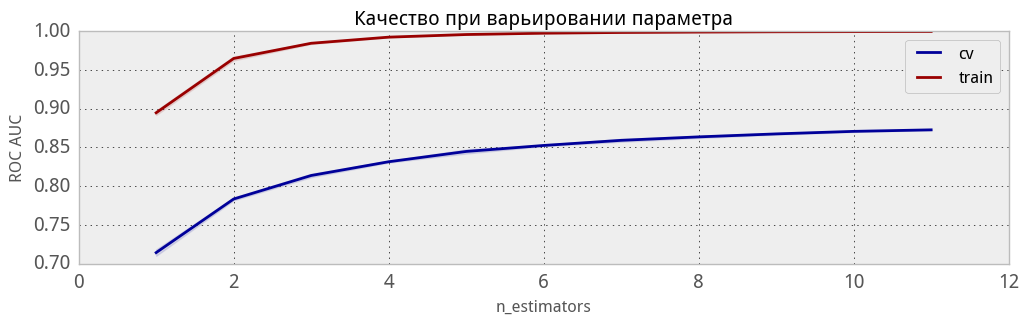

In [27]:
figsize(12, 3)

plt.plot(pars, test_errors.mean(axis=1), label="cv", lw=2, color='#000099')

plt.fill_between(pars, test_errors.mean(axis=1) - test_errors.std(axis=1),
                 test_errors.mean(axis=1) + test_errors.std(axis=1), alpha=0.1,
                 color='#000099', lw=1)

plt.plot(pars, train_errors.mean(axis=1), label="train", lw=2, color='#990000')

plt.fill_between(pars, train_errors.mean(axis=1) - train_errors.std(axis=1),
                 train_errors.mean(axis=1) + train_errors.std(axis=1), alpha=0.1,
                 color='#990000', lw=1)


plt.legend(loc="best")
# plt.ylim([0.82, 0.88]) # 1.01
plt.ylabel('ROC AUC')
plt.xlabel(param_name)
#plt.xlim([0.5, 11.5])
plt.title(u'Качество при варьировании параметра')

### график - тест

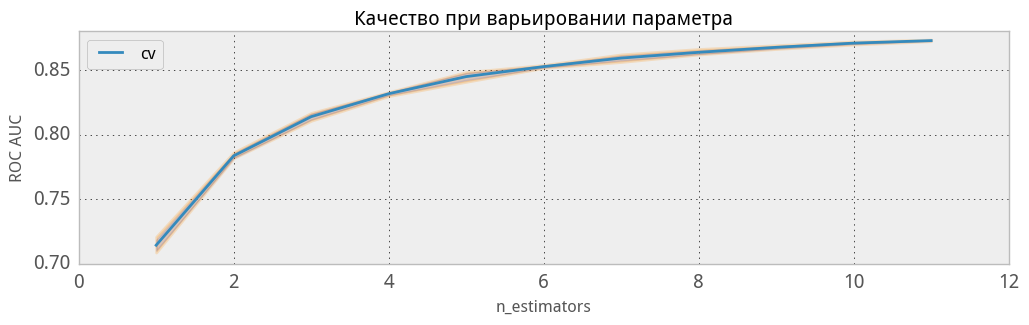

In [28]:
figsize(12, 3)

plt.plot(pars, test_errors.mean(axis=1), label="cv", lw=2)

plt.fill_between(pars, test_errors.min(axis=1),
                 test_errors.max(axis=1), alpha=0.2,
                 color="darkorange", lw=2)

plt.fill_between(pars, test_errors.mean(axis=1) - test_errors.std(axis=1),
                 test_errors.mean(axis=1) + test_errors.std(axis=1), alpha=0.1,
                 color="darkblue", lw=1)

plt.legend(loc="best")
# plt.ylim([0.82, 0.88]) # 1.01
plt.ylabel('ROC AUC')
plt.xlabel(param_name)
plt.title(u'Качество при варьировании параметра')

### Графики при разных параметрах

In [32]:
e1 = test_errors.copy() # 5

In [20]:
e2 = test_errors.copy() # 4

In [43]:
e3 = test_errors.copy() # 4

In [ ]:
e4 = test_errors.copy() # 4

In [55]:
e5 = test_errors.copy() # 4

In [58]:
e6 = test_errors.copy() # 4

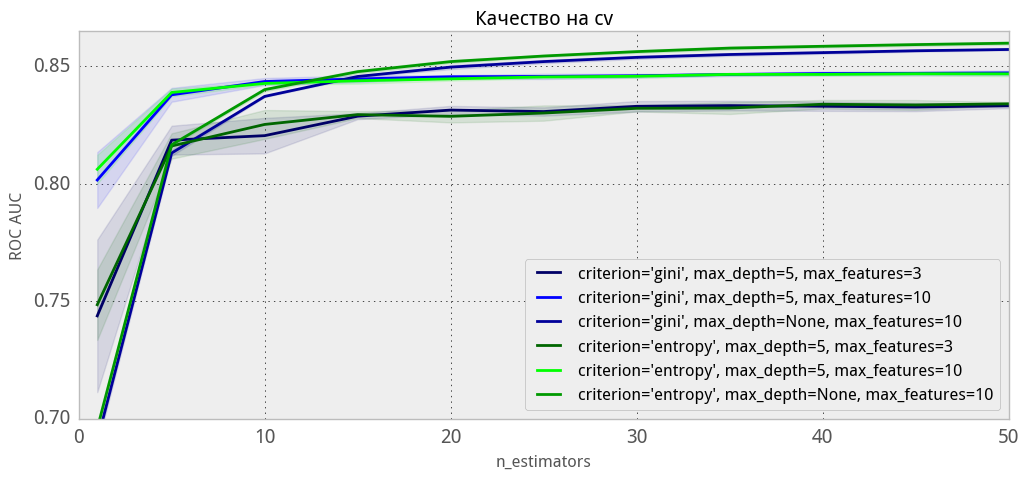

In [64]:
def plot(e1, color, label):
    plt.plot(pars, e1.mean(axis=1), label=label, lw=2, color=color)
    plt.fill_between(pars, e1.mean(axis=1) - e1.std(axis=1),
                 e1.mean(axis=1) + e1.std(axis=1), alpha=0.1,
                 color=color, lw=1)
    
figsize(12, 5)

# pars = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

plot(e5, label="criterion='gini', max_depth=5, max_features=3", color='#000066')
plot(e1, label="criterion='gini', max_depth=5, max_features=10", color='#0000FF')
plot(e2, label="criterion='gini', max_depth=None, max_features=10", color='#000099')

plot(e6, label="criterion='entropy', max_depth=5, max_features=3", color='#006600')
plot(e3, label="criterion='entropy', max_depth=5, max_features=10", color='#00FF00')
plot(e4, label="criterion='entropy', max_depth=None, max_features=10", color='#009900')

#plot(e3, label="learning_rate=0.3", color='#990000')
#plot(e4, label="learning_rate=0.2", color='#999999')
# plt.plot(pars, e1.mean(axis=1), label="learning_rate=0.5", lw=2, color='#000099')
#plt.plot(pars, e2.mean(axis=1), label="learning_rate=0.4", lw=2, color='#000099')
#plt.plot(pars, e3.mean(axis=1), label="learning_rate=0.3", lw=2, color='#000099')


plt.legend(loc="best")
plt.ylim([0.7, 0.865]) # 1.01
plt.ylabel('ROC AUC')
plt.xlabel(param_name)
#plt.xlim([0.5, 11.5])
plt.title(u'Качество на cv')

### Рейтинги признаков

Встроенный и ручной

In [91]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=10,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)
rf.fit(X, y)

    

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [98]:
# shuffle - метод

from sklearn.metrics import roc_auc_score

e = []

a = rf.predict(X2)
q = roc_auc_score(y2, a)

for t in range(X2.shape[1]):
    Xt = X2.copy()
    np.random.shuffle(Xt[:, t])
    at = rf.predict(Xt)
    e.append(roc_auc_score(y2, at))


(0.6, 0.85)

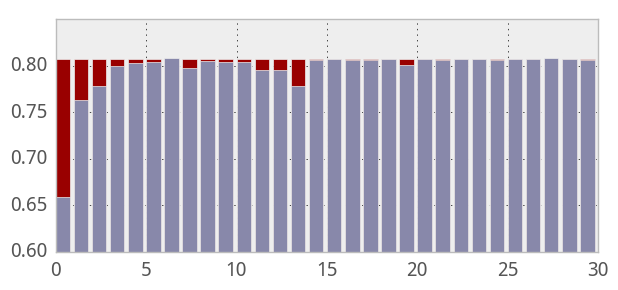

In [107]:
e = np.array(e)
plt.bar(np.arange(len(e)), e*0 + q, color = '#990000')
plt.bar(np.arange(len(e)), e, color = '#8888AA')
plt.ylim([0.6, 0.85])

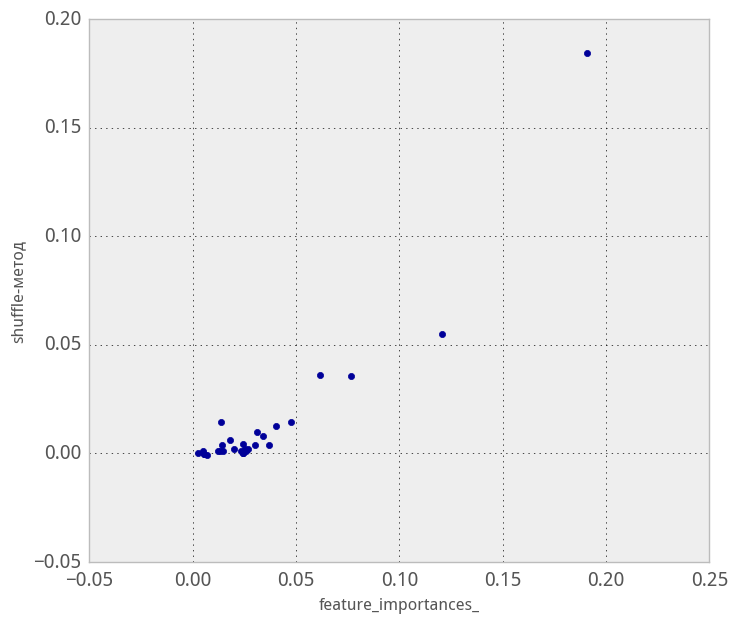

In [112]:
plt.figure(figsize(8, 7))
plt.scatter(rf.feature_importances_, (q-e)/q, color = '#000099')
plt.xlabel(u'feature_importances_')
plt.ylabel(u'shuffle-метод')

### Визуализация деревьев

In [29]:
# визуализация дерева
# см. http://dreampuf.github.io/GraphvizOnline/
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

### Разделяющие поверхности

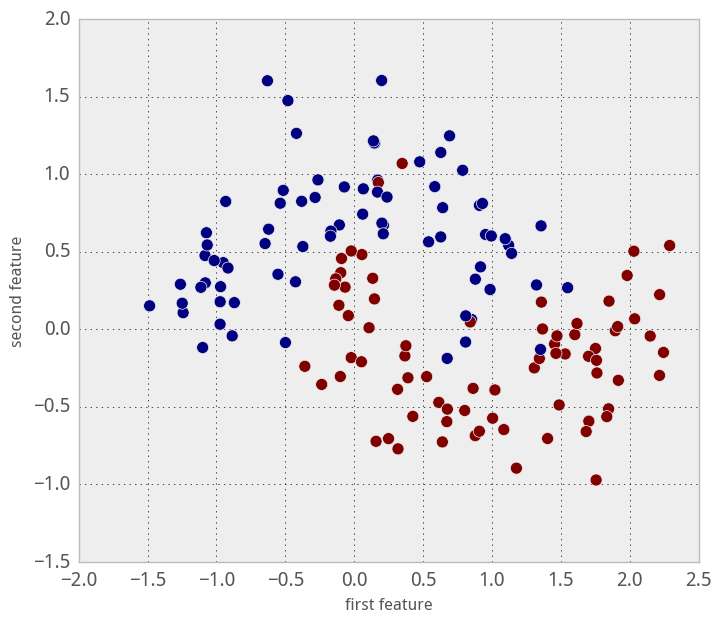

In [54]:
from sklearn.datasets import make_moons
X, y = make_moons(150, noise=0.3)
figsize(8, 7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

In [70]:
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['#BBBBFF', '#FFBBBB'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

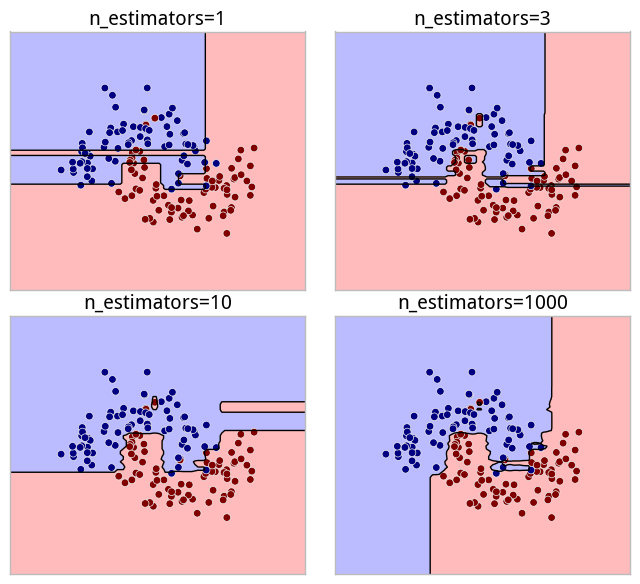

In [71]:
rf = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

f, axarr = plt.subplots(2, 2)
rf = RandomForestClassifier(n_estimators=1, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 0])
axarr[0, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 0].set_title('n_estimators=1')

rf = RandomForestClassifier(n_estimators=3, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 1])
axarr[0, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 1].set_title('n_estimators=3')

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 0])
axarr[1, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 0].set_title('n_estimators=10')

rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 1])
axarr[1, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 1].set_title('n_estimators=1000')

f.subplots_adjust(hspace=0.1, wspace=0.1)
# f.set_title('Изменение параметров на модельной задаче')



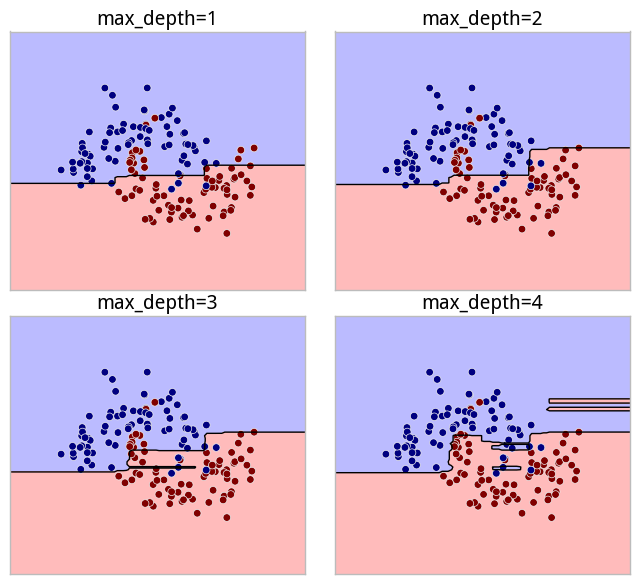

In [74]:
rf = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

f, axarr = plt.subplots(2, 2)
rf = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 0])
axarr[0, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 0].set_title('max_depth=1')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 1])
axarr[0, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 1].set_title('max_depth=2')

rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 0])
axarr[1, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 0].set_title('max_depth=3')

rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 1])
axarr[1, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 1].set_title('max_depth=4')

f.subplots_adjust(hspace=0.1, wspace=0.1)
# f.set_title('Изменение параметров на модельной задаче')

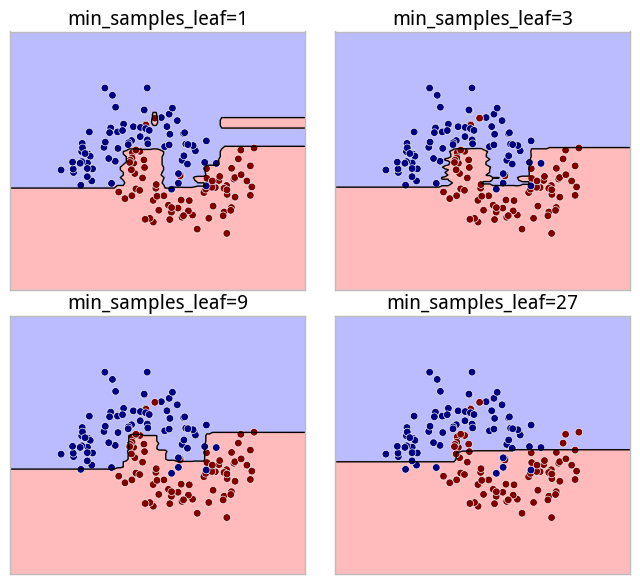

In [75]:
rf = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

f, axarr = plt.subplots(2, 2)
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=1, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 0])
axarr[0, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 0].set_title('min_samples_leaf=1')

rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=3, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 1])
axarr[0, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 1].set_title('min_samples_leaf=3')

rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=9, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 0])
axarr[1, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 0].set_title('min_samples_leaf=9')

rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=27, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 1])
axarr[1, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 1].set_title('min_samples_leaf=27')

f.subplots_adjust(hspace=0.1, wspace=0.1)
# f.set_title('Изменение параметров на модельной задаче')

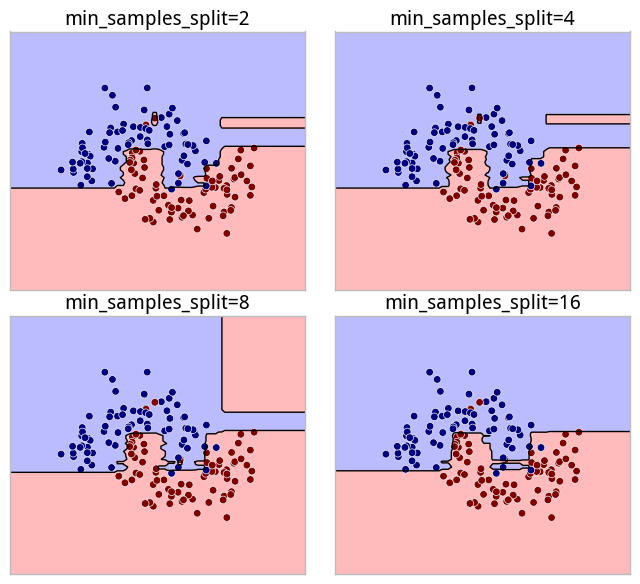

In [78]:
rf = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

f, axarr = plt.subplots(2, 2)
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 0])
axarr[0, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 0].set_title('min_samples_split=2')

rf = RandomForestClassifier(n_estimators=10, min_samples_split=4, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0, 1])
axarr[0, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0, 1].set_title('min_samples_split=4')

rf = RandomForestClassifier(n_estimators=10, min_samples_split=8, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 0])
axarr[1, 0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 0].set_title('min_samples_split=8')

rf = RandomForestClassifier(n_estimators=10, min_samples_split=16, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1, 1])
axarr[1, 1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1, 1].set_title('min_samples_split=16')

f.subplots_adjust(hspace=0.1, wspace=0.1)
# f.set_title('Изменение параметров на модельной задаче')

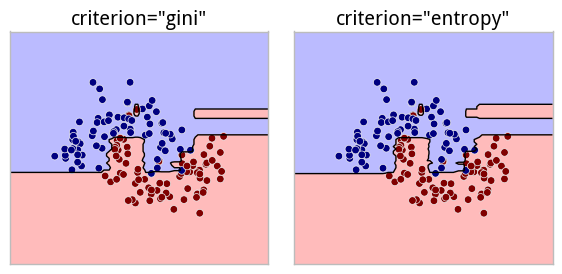

In [84]:
rf = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

figsize(7,3)
f, axarr = plt.subplots(1, 2)
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0])
axarr[0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0].set_title('criterion="gini"')

rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1])
axarr[1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1].set_title('criterion="entropy"')


f.subplots_adjust(hspace=0.1, wspace=0.1)
# f.set_title('Изменение параметров на модельной задаче')

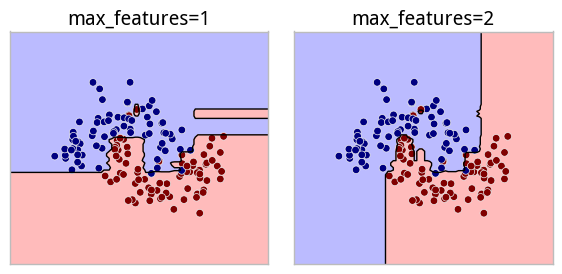

In [86]:
rf = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1,
                       max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                       n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

figsize(7,3)
f, axarr = plt.subplots(1, 2)
rf = RandomForestClassifier(n_estimators=10, max_features=1, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[0])
axarr[0].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[0].set_title('max_features=1')

rf = RandomForestClassifier(n_estimators=10, max_features=2, random_state=0)
rf.fit(X, y)
plot_2d_separator(rf, X, fill=True, ax=axarr[1])
axarr[1].scatter(X[:, 0], X[:, 1], c=y, s=30)
axarr[1].set_title('max_features=2')


f.subplots_adjust(hspace=0.1, wspace=0.1)
# f.set_title('Изменение параметров на модельной задаче')

## Задача регрессии

In [42]:
x = np.random.rand(50)
y = np.sin(x * 10) * x

In [ ]:
# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

(-0.01, 1.01)

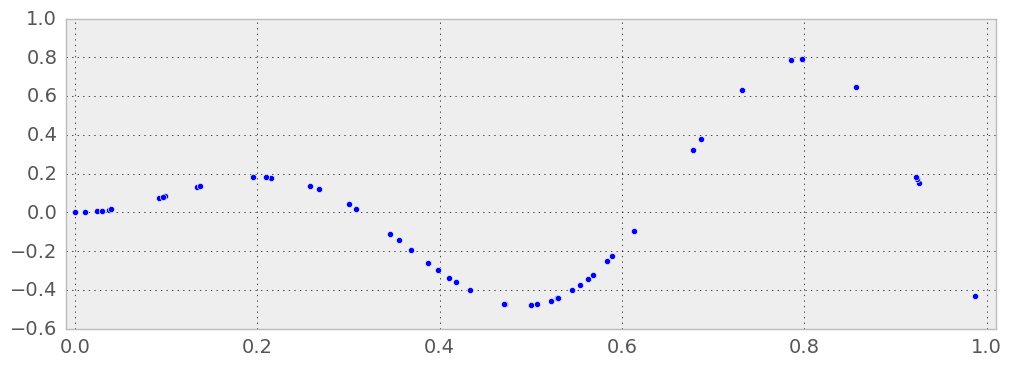

In [28]:
figsize(12,4)
plt.scatter(x, y)
plt.xlim([-0.01, 1.01])

In [36]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

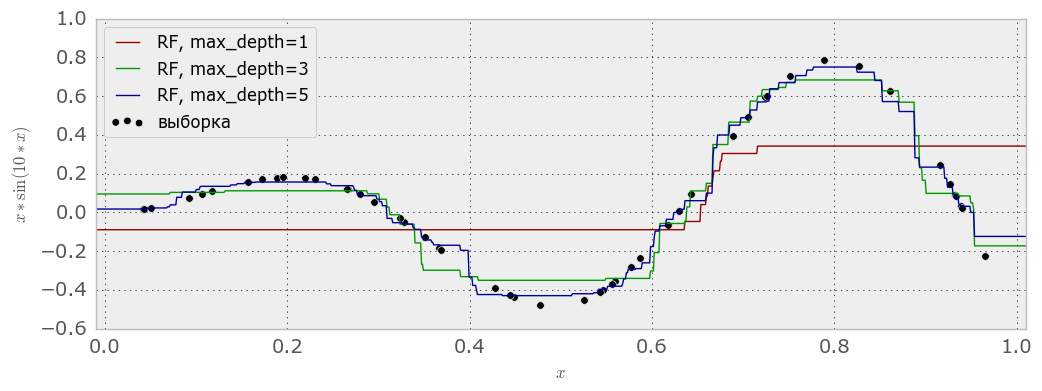

In [54]:
clf1 = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=1, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)
clf2 = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=3, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)
clf3 = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=5, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)


clf1.fit(pd.DataFrame({'x': x}), y)
clf2.fit(pd.DataFrame({'x': x}), y)
clf3.fit(pd.DataFrame({'x': x}), y)

figsize(12,4)
ls = np.linspace(-0.01, 1.01, 1000)
plt.plot(ls, clf1.predict(pd.DataFrame({'x': ls})), color='#990000', label='RF, max_depth=1')
plt.plot(ls, clf2.predict(pd.DataFrame({'x': ls})), color='#009900', label='RF, max_depth=3')
plt.plot(ls, clf3.predict(pd.DataFrame({'x': ls})), color='#000099', label='RF, max_depth=5')
plt.scatter(x, y, 30, '#000000', label=u'выборка')
plt.xlim([-0.01, 1.01])
plt.xlabel('$x$')
plt.ylabel('$x*\sin(10*x)$')
plt.legend(loc='best')

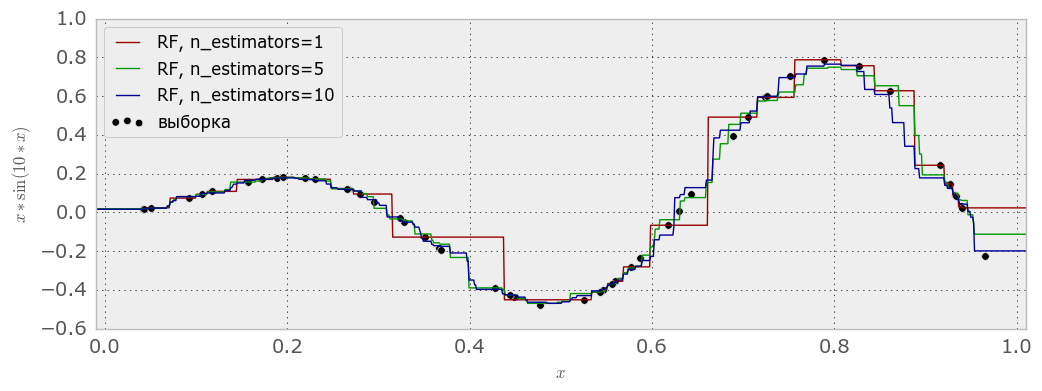

In [55]:
clf1 = RandomForestRegressor(n_estimators=1, criterion='mse', max_depth=None, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)
clf2 = RandomForestRegressor(n_estimators=5, criterion='mse', max_depth=None, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)
clf3 = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)


clf1.fit(pd.DataFrame({'x': x}), y)
clf2.fit(pd.DataFrame({'x': x}), y)
clf3.fit(pd.DataFrame({'x': x}), y)

figsize(12,4)
ls = np.linspace(-0.01, 1.01, 1000)
plt.plot(ls, clf1.predict(pd.DataFrame({'x': ls})), color='#990000', label='RF, n_estimators=1')
plt.plot(ls, clf2.predict(pd.DataFrame({'x': ls})), color='#009900', label='RF, n_estimators=5')
plt.plot(ls, clf3.predict(pd.DataFrame({'x': ls})), color='#000099', label='RF, n_estimators=10')
plt.scatter(x, y, 30, '#000000', label=u'выборка')
plt.xlim([-0.01, 1.01])
plt.xlabel('$x$')
plt.ylabel('$x*\sin(10*x)$')
plt.legend(loc='best')

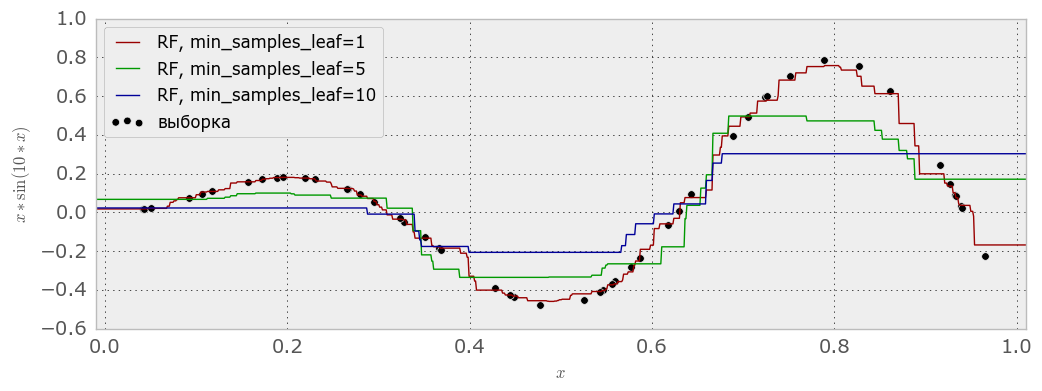

In [56]:
clf1 = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)
clf2 = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2,
                            min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)
clf3 = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2,
                            min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False)


clf1.fit(pd.DataFrame({'x': x}), y)
clf2.fit(pd.DataFrame({'x': x}), y)
clf3.fit(pd.DataFrame({'x': x}), y)

figsize(12,4)
ls = np.linspace(-0.01, 1.01, 1000)
plt.plot(ls, clf1.predict(pd.DataFrame({'x': ls})), color='#990000', label='RF, min_samples_leaf=1')
plt.plot(ls, clf2.predict(pd.DataFrame({'x': ls})), color='#009900', label='RF, min_samples_leaf=5')
plt.plot(ls, clf3.predict(pd.DataFrame({'x': ls})), color='#000099', label='RF, min_samples_leaf=10')
plt.scatter(x, y, 30, '#000000', label=u'выборка')
plt.xlim([-0.01, 1.01])
plt.xlabel('$x$')
plt.ylabel('$x*\sin(10*x)$')
plt.legend(loc='best')